In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

### Importing and Reading the dataset.

In [2]:
data = pd.read_csv("Churn.csv",index_col="RowNumber")
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
## missing values
data.isnull().sum()
## clean data

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
## checking the stats 
display(data.describe())

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
data.describe(include="object")

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


### Exploratory Data Analysis.

#### Gender.

In [6]:
## Checking gender dist.
data.Gender.value_counts(normalize=True)

Male      0.5457
Female    0.4543
Name: Gender, dtype: float64

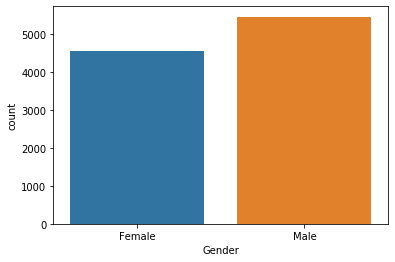

In [7]:
## visualizing gender distribution
sns.countplot(x="Gender",data=data)

#### Country.

In [8]:
data.Geography.value_counts(normalize=True)

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64

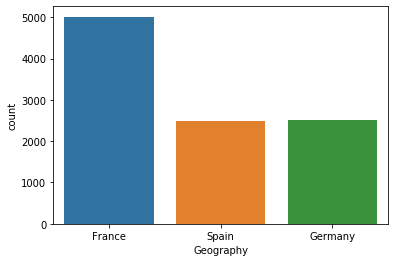

In [9]:
## visualizing geography distribution
sns.countplot(x="Geography",data=data)

Distribution of people who churned


Germany    0.399607
France     0.397644
Spain      0.202749
Name: Geography, dtype: float64

Distribution of people who didnt churn


France     0.527942
Spain      0.259199
Germany    0.212859
Name: Geography, dtype: float64

Churn per country:
Germany:


0    0.675568
1    0.324432
Name: Exited, dtype: float64

France:


0    0.838452
1    0.161548
Name: Exited, dtype: float64

Spain:


0    0.833266
1    0.166734
Name: Exited, dtype: float64

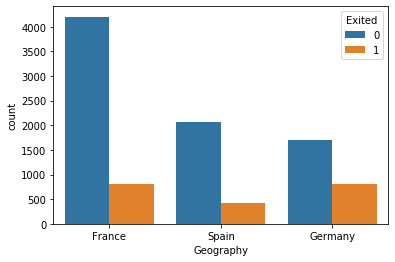

In [15]:
## relation between churn and country of origin
sns.countplot(x="Geography",data=data,hue="Exited")
print("Distribution of people who churned")
display(data[data.Exited==1].Geography.value_counts(normalize=True))
print("Distribution of people who didnt churn")
display(data[data.Exited==0].Geography.value_counts(normalize=True))
print("Churn per country:")
print("Germany:")
display(data[data.Geography=="Germany"].Exited.value_counts(normalize=True))
print("France:")
display(data[data.Geography=="France"].Exited.value_counts(normalize=True))
print("Spain:")
display(data[data.Geography=="Spain"].Exited.value_counts(normalize=True))

#### Age distribution.

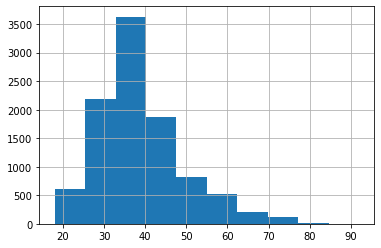

In [22]:
## histogram of ages.
data.Age.hist(bins=10)

#### Purchased products.

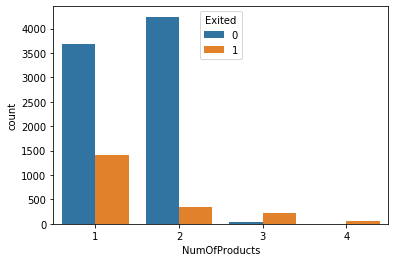

In [27]:
sns.countplot(x="NumOfProducts",data=data,hue="Exited")

In [20]:
## We can notice that the churn rate seems highly correlated to the number of purchased product especially if the nbr>2
print("Owner of 1 product:")
display(pd.DataFrame(data[data.NumOfProducts==1].Exited.value_counts(normalize=True)))
print("Owner of 2 products:")

display(pd.DataFrame(data[data.NumOfProducts==2].Exited.value_counts(normalize=True)))
print("Owner of 3 products:")

display(pd.DataFrame(data[data.NumOfProducts==3].Exited.value_counts(normalize=True)))
print("Owner of 4 products:")

display(pd.DataFrame(data[data.NumOfProducts==4].Exited.value_counts()))

Owner of 1 product:


,Exited
0,0.722856
1,0.277144


Owner of 2 products:


,Exited
0,0.924183
1,0.075817


Owner of 3 products:


,Exited
1,0.827068
0,0.172932


Owner of 4 products:


,Exited
1,60


#### Credit cards.


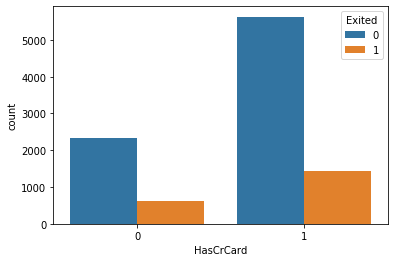

In [21]:
sns.countplot(x="HasCrCard",data=data,hue="Exited")

In [22]:
## Does having a credit card affect the churn rate?

## Exited portion.
display(data[data.Exited==1].HasCrCard.value_counts(normalize="True"))

## Didnt exit.
display(data[data.Exited==0].HasCrCard.value_counts(normalize="True"))


## Since the distribution for both is the same, we can conclude that the credit card isnt correlated with the churn.

1    0.699067
0    0.300933
Name: HasCrCard, dtype: float64

1    0.707146
0    0.292854
Name: HasCrCard, dtype: float64

#### Active members

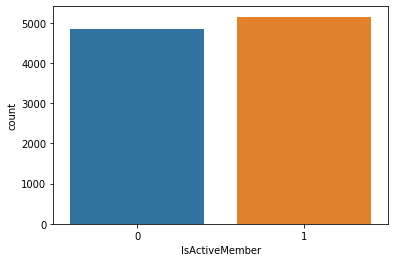

In [23]:
sns.countplot(x="IsActiveMember",data=data)

## Modeling

In [24]:
## removing unnecessary columns ["CustomerId","Surname"]
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
new_data = data.drop( ["CustomerId","Surname"],axis=1)
new_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
### Geography dummies.
country_dummies = pd.get_dummies(new_data.Geography,prefix="C")
country_dummies.head()

,C_France,C_Germany,C_Spain
RowNumber,,,
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0
5,0,0,1


In [27]:
new_data = pd.concat([new_data,country_dummies],axis=1)
new_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,C_France,C_Germany,C_Spain
RowNumber,,,,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [28]:
new_data = new_data.drop(["Geography"],axis=1)
new_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,C_France,C_Germany,C_Spain
RowNumber,,,,,,,,,,,,,
1,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [29]:
### Gender dummification.
gender_dummies = pd.get_dummies(new_data.Gender,drop_first=True)

In [31]:
new_data = pd.concat([new_data,gender_dummies],axis=1)
new_data = new_data.drop(["Gender"],axis=1)
new_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,C_France,C_Germany,C_Spain,Male
RowNumber,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,0
2,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,0
3,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,0
4,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,0
5,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,0


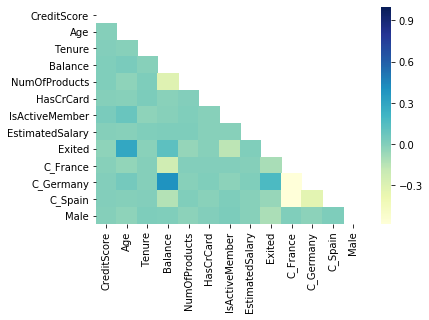

In [33]:
corr = new_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,cmap="YlGnBu")

#### All data is now Numerical. We can start by fitting a baseline model.


In [34]:
features = new_data.drop("Exited",axis=1)
labels = new_data.Exited

In [35]:
from sklearn.model_selection import train_test_split
## to be used when doing cross validation
X, X_test, y ,y_test = train_test_split(features,labels,test_size=0.2,random_state=123)

In [36]:
## to be used when using train validation set only
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123)

In [38]:
print("X shape is:",X.shape)
print("X_train shape is:",X_train.shape)

X shape is: (8000, 12)
X_train shape is: (6400, 12)


### Baseline model Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

lr=LogisticRegression(random_state=1)
## fitting the model
lr.fit(X_train,y_train)
## predicting
predictions= lr.predict(X_val)
## checking the accuracy
print("The baseline model accuracy on the validation set is {}".format(accuracy_score(y_val,predictions)))


The baseline model accuracy on the validation set is 0.7875


In [69]:
def transform_CM(CM):
    dico={"True Positive":CM[1,1],"True Negative":CM[0,0],"False Positive":CM[0,1],"False Negative":CM[1,0]}
    data_frame=pd.DataFrame(dico,index=range(1))
    return(data_frame)


In [70]:
CM=confusion_matrix(y_val,predictions)
transform_CM(CM)

,True Positive,True Negative,False Positive,False Negative
0,20,1240,38,302


#### Improving the Baseline Model 
- Tweaking the LogReg parameters.
- Normalizing 
- Other?

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
## Scaling the data for better modeling
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)
## setting the parameters
class_weight=["balanced",{1:5,0:1},{1:10,0:1},{1:2,0:1}]
C=[0.01,0.01,0.1,1,10,100]
param_grid={"C":C,"class_weight":class_weight}
## creating the grid Search
grid = GridSearchCV(estimator=LogisticRegression(max_iter=1000),cv=10,param_grid=param_grid,scoring="accuracy",verbose=1)
# fitting the model
grid.fit(X_scaled,y)


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    1.7s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', {0: 1, 1: 5},
                                          {0: 1, 1: 10}, {0: 1, 1: 2}]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [82]:
print("Grid Search best score is:",grid.best_score_)
print("Grid Search best parameters are:",grid.best_params_)

Grid Search best score is: 0.79925
Grid Search best parameters are: {'C': 0.01, 'class_weight': {1: 2, 0: 1}}


In [93]:
## Final logistic regression model , tuned with the best parameters
lr_best_scores = LogisticRegression(C=0.01,class_weight={1:2,0:1},max_iter=1000,random_state=3)
## scaling the data
X_train_scaled= scaler.fit_transform(X_train)
X_val_scaled= scaler.transform(X_val)
## fitting the model
lr_best_scores.fit(X_train_scaled,y_train)
## predicting
predictions_best_scores = lr_best_scores.predict(X_val_scaled)

## Accuracy and confusion matrix.

print("The baseline tuned accuracy on the validation set is {}".format(accuracy_score(y_val,predictions_best_scores)))

CM_best = confusion_matrix(y_val,predictions_best_scores)

display(transform_CM(CM_best))


The baseline tuned accuracy on the validation set is 0.801875


,True Positive,True Negative,False Positive,False Negative
0,131,1152,126,191


In [94]:
## Balancing the data through class weights.

lr_2 = LogisticRegression(C=0.01,class_weight={1:1,0:1},max_iter=1000,random_state=3)
## fitting the model
lr_2.fit(X_train_scaled,y_train)
## predicting
predictions_2 = lr_2.predict(X_val_scaled)

## Accuracy and confusion matrix.

print("The tuned model accuracy on the validation set is {}".format(accuracy_score(y_val,predictions_2)))

CM_best2 = confusion_matrix(y_val,predictions_2)
## displaying the confusion matrix 
display(transform_CM(CM_best2))

The tuned model accuracy on the validation set is 0.811875


,True Positive,True Negative,False Positive,False Negative
0,49,1250,28,273


### Decision Tree Classifier

In [105]:
from sklearn.tree import DecisionTreeClassifier
## Applying the decision tree classifier on the non scaled data.


# tree = DecisionTreeClassifier(criterion='entropy',random_state=1)
tree = DecisionTreeClassifier(criterion='gini',random_state=1,splitter="best")
# tree = DecisionTreeClassifier(criterion='gini',random_state=1,splitter="random")

# model fitting
tree.fit(X_train,y_train)
# model prediction
tree_prediction = tree.predict(X_val)
# model accuracy
print("The baseline Tree model accuracy on the validation set is {}".format(accuracy_score(y_val,tree_prediction)))

CM_tree = confusion_matrix(y_val,tree_prediction)

## displaying the confusion matrix 
display(transform_CM(CM_tree))

The baseline Tree model accuracy on the validation set is 0.794375


,True Positive,True Negative,False Positive,False Negative
0,159,1112,166,163


In [107]:
## Scaled Data Decision Tree Classifier.

tree_sc = DecisionTreeClassifier(criterion='gini',random_state=1,splitter="best")

# model fitting
tree_sc.fit(X_train_scaled,y_train)
# model prediction
tree_prediction_sc = tree.predict(X_val_scaled)
# model accuracy
print("The baseline Tree model accuracy on the validation set is {}".format(accuracy_score(y_val,tree_prediction_sc)))

CM_tree = confusion_matrix(y_val,tree_prediction_sc)

## displaying the confusion matrix 
display(transform_CM(CM_tree))


The baseline Tree model accuracy on the validation set is 0.76125


,True Positive,True Negative,False Positive,False Negative
0,69,1149,129,253


### RandomForests.
- Ensemble model for DTC.
- Yields better results.
- Majority voting gives more confidence.

In [108]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train,y_train)

predictions_2= RF.predict(X_val)

print("The baseline RF model accuracy is {}".format(accuracy_score(predictions_2,y_val)))
RF_CM=confusion_matrix(y_val,predictions_2)

transform_CM(RF_CM)

The baseline RF model accuracy is 0.86625


,True Positive,True Negative,False Positive,False Negative
0,143,1243,35,179


- Our Random Forest Classifier scored better than our Logistic Regression.
- Let's try to fine tune it.


In [120]:
# n_estimators=[50,100,150,200]
# max_depth=[3,5,None]
# max_features=["auto",2,4]
# params_grid = {"n_estimators":n_estimators,"max_depth":max_depth,"max_features":max_features}
# grid_RF = GridSearchCV(estimator=RandomForestClassifier(),param_grid=params_grid,cv=10,scoring="accuracy")
# grid_RF.fit(X_scaled,y)



- Very bad idea to do the gridsearch on RandomForests since it takes forever! 


In [119]:
# print("Grid Search best score is:",grid_RF.best_score_)
# print("Grid Search best parameters are:",grid_RF.best_params_)

Grid Search best score is: 0.86525
Grid Search best parameters are: {'max_depth': None, 'max_features': 2, 'n_estimators': 100}


### Improved RandomForests AKA AdaBoost.

In [121]:
from sklearn.ensemble import AdaBoostClassifier

adaclf = AdaBoostClassifier(n_estimators=100,random_state=0)

adaclf.fit(X_train,y_train)

ada_predict = adaclf.predict(X_val)

print("The baseline RF model accuracy is {}".format(accuracy_score(ada_predict,y_val)))

Ada_CM=confusion_matrix(y_val,ada_predict)

transform_CM(Ada_CM)

The baseline RF model accuracy is 0.859375


,True Positive,True Negative,False Positive,False Negative
0,145,1230,48,177


In [126]:
adaclf1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200,random_state=0)

adaclf1.fit(X_train,y_train)

ada_predict1 = adaclf1.predict(X_val)

print("The baseline RF model accuracy is {}".format(accuracy_score(ada_predict1,y_val)))

Ada_CM=confusion_matrix(y_val,ada_predict1)

transform_CM(Ada_CM)

The baseline RF model accuracy is 0.8575


,True Positive,True Negative,False Positive,False Negative
0,144,1228,50,178


### XGBOOST

In [127]:
import xgboost as xgb

In [128]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_val)

print(confusion_matrix(y_val, y_pred))

print("XGBoost Model Accuracy:",accuracy_score(y_pred,y_val))

[[1220   58]
 [ 172  150]]
XGBoost Model Accuracy: 0.85625
